In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import datetime as dt

# 한글 폰트 설정하기
fe = fm.FontEntry(fname = 'MaruBuri-Regular.otf', name = 'MaruBuri')
fm.fontManager.ttflist.insert(0, fe)
plt.rc('font', family='MaruBuri')

In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pd.read_csv('css/sample_submission.csv')

,ID,대출등급
0,TEST_00000,G
1,TEST_00001,G
2,TEST_00002,G
3,TEST_00003,G
4,TEST_00004,G
...,...,...
64192,TEST_64192,G
64193,TEST_64193,G
64194,TEST_64194,G
64195,TEST_64195,G


In [5]:
train_df=pd.read_csv('css/train.csv')
train_df 

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,TRAIN_00000,12480000,36 months,6 years,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C
1,TRAIN_00001,14400000,60 months,10+ years,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B
2,TRAIN_00002,12000000,36 months,5 years,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A
3,TRAIN_00003,14400000,36 months,8 years,MORTGAGE,132000000,15.09,15,부채 통합,0,325824,153108.0,0.0,0.0,C
4,TRAIN_00004,18000000,60 months,Unknown,RENT,71736000,25.39,19,주요 구매,0,228540,148956.0,0.0,0.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96289,TRAIN_96289,14400000,36 months,10+ years,MORTGAGE,210000000,9.33,33,신용 카드,0,974580,492168.0,0.0,0.0,C
96290,TRAIN_96290,28800000,60 months,10+ years,MORTGAGE,132000000,5.16,25,주택 개선,0,583728,855084.0,0.0,0.0,E
96291,TRAIN_96291,14400000,36 months,1 year,MORTGAGE,84000000,11.24,22,신용 카드,0,1489128,241236.0,0.0,0.0,A
96292,TRAIN_96292,15600000,36 months,5 years,MORTGAGE,66330000,17.30,21,부채 통합,2,1378368,818076.0,0.0,0.0,D


In [27]:
train_df['주택소유상태'].drop_duplicates()

0            RENT
1        MORTGAGE
8             OWN
28730         ANY
Name: 주택소유상태, dtype: object

In [28]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [29]:
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')
pd.reset_option('display.width')
pd.reset_option('display.max_colwidth')

In [6]:
import numpy as np
def get_work_year(yr):
    if yr in ['<1 year', '< 1 year']:
        return 0
    elif yr in ['1 year', '1 years']:
        return 1
    elif yr in ['10+ years', '10+years']:
        return 10
    # 'Unknown'은 NaN으로 대체
    elif yr == 'Unknown':
        return -1
    # 그 외는 숫자만 추출
    else:
        return int(''.join(filter(str.isdigit, yr)))
train_df['근로기간'] = train_df['근로기간'].apply(get_work_year)
train_df[['근로기간']]

,근로기간
0,6
1,10
2,5
3,8
4,-1
...,...
96289,10
96290,10
96291,1
96292,5


In [7]:
train_df['근로기간']= train_df['근로기간'].astype(int)


In [8]:
train_df[['근로기간','연간소득']].corr().iloc[0]

근로기간    1.000000
연간소득    0.084006
Name: 근로기간, dtype: float64

In [33]:
train_df['총상환이자']


0             0.0
1        234060.0
2        151944.0
3        153108.0
4        148956.0
           ...   
96289    492168.0
96290    855084.0
96291    241236.0
96292    818076.0
96293    274956.0
Name: 총상환이자, Length: 96294, dtype: float64

<font color="#0067A5">##근로기간이 연간소득에 영향이 있을것이라 생각하여 corr 구했으나 무의미한 값 도출

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96294 entries, 0 to 96293
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            96294 non-null  object 
 1   대출금액          96294 non-null  int64  
 2   대출기간          96294 non-null  object 
 3   근로기간          96294 non-null  int32  
 4   주택소유상태        96294 non-null  object 
 5   연간소득          96294 non-null  int64  
 6   부채_대비_소득_비율   96294 non-null  float64
 7   총계좌수          96294 non-null  int64  
 8   대출목적          96294 non-null  object 
 9   최근_2년간_연체_횟수  96294 non-null  int64  
 10  총상환원금         96294 non-null  int64  
 11  총상환이자         96294 non-null  float64
 12  총연체금액         96294 non-null  float64
 13  연체계좌수         96294 non-null  float64
 14  대출등급          96294 non-null  object 
dtypes: float64(4), int32(1), int64(5), object(5)
memory usage: 10.7+ MB


In [35]:
train_df[['연간소득','최근_2년간_연체_횟수']].corr().iloc[0]

연간소득            1.00000
최근_2년간_연체_횟수    0.04026
Name: 연간소득, dtype: float64


<font color="#0067A5"> ##연체횟수와 소득이 관계가 있을것이라 추론하였으나 상관무

In [36]:
train_df.describe(include='all')

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
count,96294,9.629400e+04,96294,96294.000000,96294,9.629400e+04,96294.000000,96294.000000,96294,96294.000000,9.629400e+04,9.629400e+04,96294.000000,96294.000000,96294
unique,96294,NaN,2,NaN,4,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,7
top,TRAIN_00000,NaN,36 months,NaN,MORTGAGE,NaN,NaN,NaN,부채 통합,NaN,NaN,NaN,NaN,NaN,B
freq,1,NaN,64479,NaN,47934,NaN,NaN,NaN,55150,NaN,NaN,NaN,NaN,NaN,28817
mean,NaN,1.830400e+07,NaN,5.595084,NaN,9.392672e+07,19.379590,25.304827,NaN,0.345681,8.225035e+05,4.282282e+05,54.380584,0.005805,NaN
std,NaN,1.032908e+07,NaN,3.975543,NaN,9.956871e+07,33.569559,12.088566,NaN,0.919119,1.027745e+06,4.402111e+05,1414.769218,0.079966,NaN
min,NaN,1.200000e+06,NaN,-1.000000,NaN,0.000000e+00,0.000000,4.000000,NaN,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,NaN
25%,NaN,1.020000e+07,NaN,2.000000,NaN,5.760000e+07,12.650000,17.000000,NaN,0.000000,3.075720e+05,1.346160e+05,0.000000,0.000000,NaN
50%,NaN,1.680000e+07,NaN,6.000000,NaN,7.800000e+07,18.740000,24.000000,NaN,0.000000,5.976960e+05,2.870040e+05,0.000000,0.000000,NaN
75%,NaN,2.400000e+07,NaN,10.000000,NaN,1.128000e+08,25.540000,32.000000,NaN,0.000000,1.055076e+06,5.702160e+05,0.000000,0.000000,NaN


In [37]:
A= train_df[['대출금액','총상환원금']]

In [38]:
# 상관 행렬 확인
correlation_matrix = A.corr()
print(correlation_matrix)

           대출금액     총상환원금
대출금액   1.000000  0.379061
총상환원금  0.379061  1.000000


대출금액, 총상환원금의 상관관계도 낮은것으로 도출

<font color="#0067A5">
## 가설 1. 소득대비 대출금액과 상환율 확인 - 여기서 문제점은 총상환원금이 현재까지 납부한 총상환원금인지, 총대출금액에서의 총상환원금을 의미하는건지 중의적 해석이 존재함.

##가설 2. 연체계좌비율과 주택소유상태 확인, 이는 등급에 어떤 영향을 미치는지 확인 

##가설 3. 총상환원금이 크고, 등급이 A에 가까울수록 많이 값았다고 추정 가설 


#그룹으로 자르기) 대출목적: 주택개선, 부채통합
##분석내용 (글쓰기 , 가설 작성, 산출 목표 사전설계후 코드작성)
 

##방법 
#1.집계 /주택소유별로 연체횟수 평균을 구함/ group by 
#2.주택소유상태 범주형 ,최근 2년간 연체횟수 수치화 (시각화)
#pandasd group by 문법활용

In [39]:
train_df[['주택소유상태','최근_2년간_연체_횟수']].groupby(['주택소유상태']).mean()

,최근_2년간_연체_횟수
주택소유상태,
ANY,0.000000
MORTGAGE,0.389661
OWN,0.337057
RENT,0.292216


In [40]:
train_df[train_df['연체계좌수']==4]
#대출금액/총상환원금 두가지경우 지금까지 낸 금액의 총합 ? or 대출 받은금액의 총상환금액

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
86578,TRAIN_86578,6000000,36 months,10,OWN,45600000,28.49,29,부채 통합,4,138036,54564.0,0.0,4.0,C


<font color="#0067A5"> 위의 데이터를 통해 ID86578 유저는
부채대비소득비율이 높은편이며, 최근 2년연체횟수가 많음에도 대출등급은 비교적 C등급으로 상방한점.


그리고 총연체횟수가 4번인데 반해, 총연체금액이 0 이라는 의문점을 가짐에 따라
주택소유상태가 대출 등급에 영향을 미칠 수 있지 않을까 고민하게됨.

고민의 이유는 아래 데이터 ID 96292 유저의 부채/소득비율과 연간소득 주택소유상태 , 대출등급이 ID 86578과 비교되기 때문이였음<font color="#FF0000">빨간색 글자</font>
(결국 자가인지 모기지인지 렌트인지?)


In [41]:
train_df[['주택소유상태','대출목적']]

,주택소유상태,대출목적
0,RENT,부채 통합
1,MORTGAGE,주택 개선
2,MORTGAGE,부채 통합
3,MORTGAGE,부채 통합
4,RENT,주요 구매
...,...,...
96289,MORTGAGE,신용 카드
96290,MORTGAGE,주택 개선
96291,MORTGAGE,신용 카드
96292,MORTGAGE,부채 통합


<font color="#0067A5">
연체계좌비율 (가설2)확인과정

In [42]:
# 연체 계좌 비율 생성
train_df['연체 계좌 비율'] = train_df['연체계좌수'] / train_df['총계좌수']

# 대출금액 대비 연체금액 비율 생성
train_df['대출금액 대비 연체금액 비율'] = train_df['총연체금액'] / train_df['대출금액']

# 가설에 따른 변수들과 신용 등급 간의 관계 분석
# 예를 들어, 연체 계좌 비율이 높은 그룹과 낮은 그룹 간의 신용 등급 분포 비교 등
train_df


,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급,연체 계좌 비율,대출금액 대비 연체금액 비율
0,TRAIN_00000,12480000,36 months,6,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C,0.0,0.0
1,TRAIN_00001,14400000,60 months,10,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B,0.0,0.0
2,TRAIN_00002,12000000,36 months,5,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A,0.0,0.0
3,TRAIN_00003,14400000,36 months,8,MORTGAGE,132000000,15.09,15,부채 통합,0,325824,153108.0,0.0,0.0,C,0.0,0.0
4,TRAIN_00004,18000000,60 months,-1,RENT,71736000,25.39,19,주요 구매,0,228540,148956.0,0.0,0.0,B,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96289,TRAIN_96289,14400000,36 months,10,MORTGAGE,210000000,9.33,33,신용 카드,0,974580,492168.0,0.0,0.0,C,0.0,0.0
96290,TRAIN_96290,28800000,60 months,10,MORTGAGE,132000000,5.16,25,주택 개선,0,583728,855084.0,0.0,0.0,E,0.0,0.0
96291,TRAIN_96291,14400000,36 months,1,MORTGAGE,84000000,11.24,22,신용 카드,0,1489128,241236.0,0.0,0.0,A,0.0,0.0
96292,TRAIN_96292,15600000,36 months,5,MORTGAGE,66330000,17.30,21,부채 통합,2,1378368,818076.0,0.0,0.0,D,0.0,0.0


<font color="#FF0000">원핫인코더를 통해 확인하고 싶은게 있었는데 보다 라벨 인코더를 활용해보라는 피드백


In [43]:


# # from sklearn.preprocessing import OneHotEncoder

# # 원핫인코더 객체 생성 ///라벨 인코더 (범주형-순서형인경우 찾기 쉬움)
# encoder = OneHotEncoder()

# # 데이터를 원핫인코딩
# encoded_data = encoder.fit_transform(train_df)

# # 결과를 밀집 배열로 변환 (Sparse Matrix -> Dense Array)
# encoded_data_dense = encoded_data.toarray()


<font color="#0067A5">밑에는 모델을 만들때 쓰려고 했던 


In [44]:
pip install  mkdir


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [45]:
import mkdir as my_rule_based_model

In [46]:
pip install statsmodels


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [47]:
# import statsmodels.api as sm

# # 종속 변수와 독립 변수 선택
# X = train_df[['연체 계좌 비율', '대출금액 대비 연체금액 비율', '부채_대비_소득_비율', '대출기간']]
# y = train_df['대출등급']

# # 상수 항 추가
# X = sm.add_constant(X)

# # 모형 적합
# model = sm.OLS(y, X).fit()

# # 결과 출력
# print(model.summary())
# #모델로는 해석할 수 없음.
# #특정변수가 영향을 준다/안준다
# #통계분석 결과로 인사이트 파악


<font color="#FF0000">
이 모든게 해결될 시 종합부분 => a 100 차등점수 (corr)- 100점에 영향주는게 어떤 변수인지 

### 회의 이후


## GRADE DIV

In [48]:
# 대출기간 전처리
def get_loan_month(mt):
    return int(mt.strip().replace('months', ''))

train_df['대출기간'] = train_df['대출기간'].apply(get_loan_month)
train_df[['대출기간']]

,대출기간
0,36
1,60
2,36
3,36
4,60
...,...
96289,36
96290,60
96291,36
96292,36


In [10]:
# 근로기간 전처리
def get_work_year(yr):
    if yr in ['<1 year', '< 1 year']:
        return  0
    elif yr in ['1 year', '1 years']:
        return  1
    elif yr in ['10+ years', '10+years']:
        return  10
    # 'Unknown'은 NaN으로 대체
    elif yr == 'Unknown':
        return  -1
    # 그 외는 숫자만 추출
    else:
        return int(''.join(filter(str.isdigit, yr)))



In [11]:
train_df['근로기간']= train_df['근로기간'].astype(int)


In [51]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96294 entries, 0 to 96293
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               96294 non-null  object 
 1   대출금액             96294 non-null  int64  
 2   대출기간             96294 non-null  int64  
 3   근로기간             96294 non-null  int32  
 4   주택소유상태           96294 non-null  object 
 5   연간소득             96294 non-null  int64  
 6   부채_대비_소득_비율      96294 non-null  float64
 7   총계좌수             96294 non-null  int64  
 8   대출목적             96294 non-null  object 
 9   최근_2년간_연체_횟수     96294 non-null  int64  
 10  총상환원금            96294 non-null  int64  
 11  총상환이자            96294 non-null  float64
 12  총연체금액            96294 non-null  float64
 13  연체계좌수            96294 non-null  float64
 14  대출등급             96294 non-null  object 
 15  연체 계좌 비율         96294 non-null  float64
 16  대출금액 대비 연체금액 비율  96294 non-null  float64
dtypes: float64(6

In [12]:
train_df2 = train_df.copy()

# A~G = 6~0
def get_grade_num(x):
    if x == 'A': return 6
    if x == 'B': return 5
    if x == 'C': return 4
    if x == 'D': return 3
    if x == 'E': return 2
    if x == 'F': return 1
    if x == 'G': return 0

train_df2['grade'] = train_df2['대출등급'].apply(lambda x : get_grade_num(x))
train_df2 = train_df2.drop(['대출등급'], axis = 1)
train_df2 = train_df2.drop(['주택소유상태'], axis = 1)
train_df2 = train_df2.drop(['대출목적'], axis = 1)
#숫자형 ID Drop
train_df2 = train_df2.drop(['ID'], axis=1)
train_df2.head()

,대출금액,대출기간,근로기간,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,grade
0,12480000,36 months,6,72000000,18.90,15,0,0,0.0,0.0,0.0,4
1,14400000,60 months,10,130800000,22.33,21,0,373572,234060.0,0.0,0.0,5
2,12000000,36 months,5,96000000,8.60,14,0,928644,151944.0,0.0,0.0,6
3,14400000,36 months,8,132000000,15.09,15,0,325824,153108.0,0.0,0.0,4
4,18000000,60 months,-1,71736000,25.39,19,0,228540,148956.0,0.0,0.0,5


In [53]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

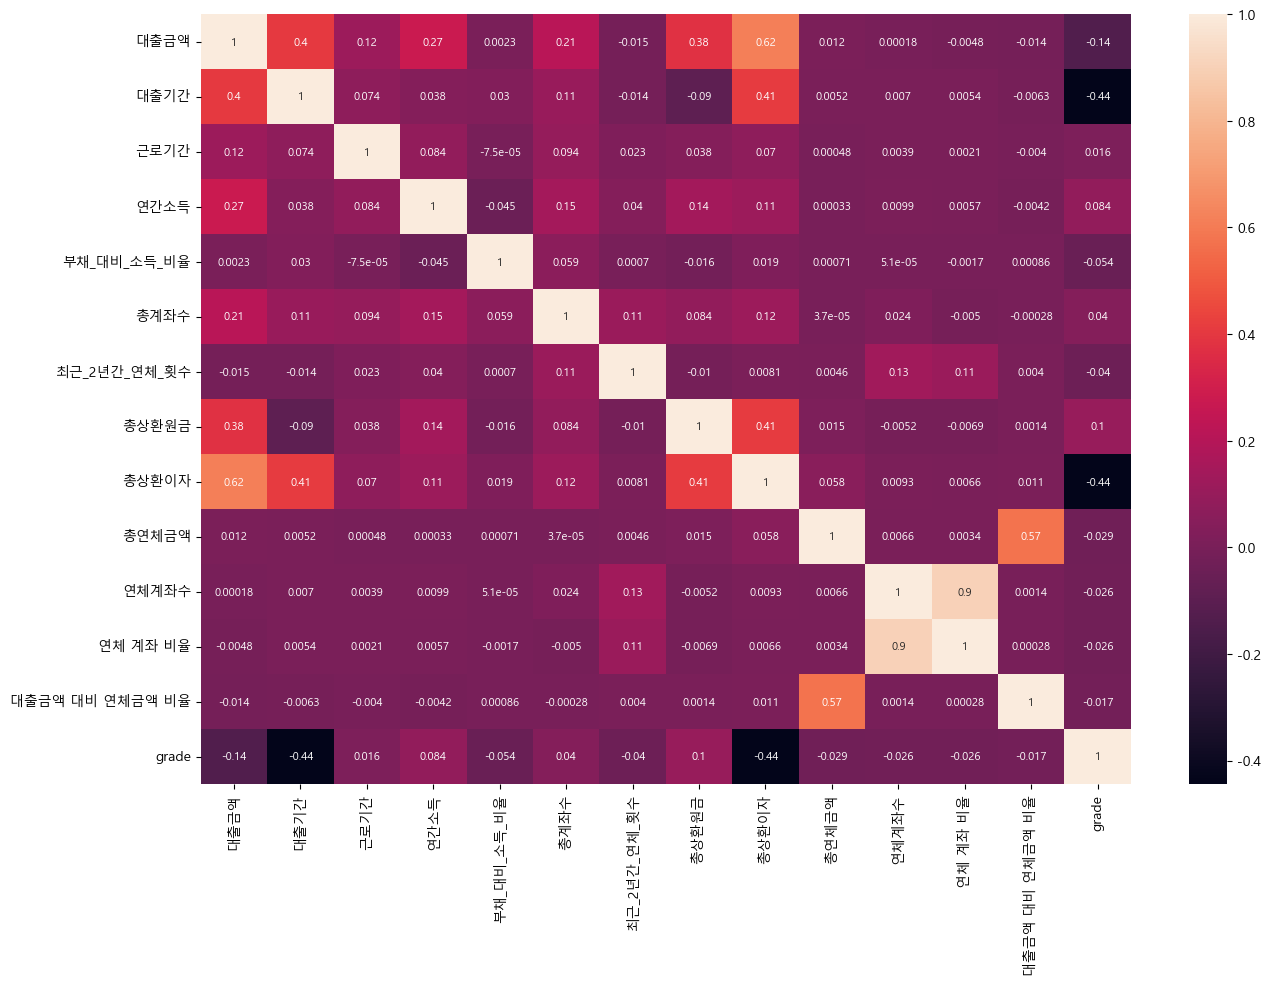

In [54]:
plt.rcParams["figure.figsize"] = (15,10)
sns.heatmap(train_df2.corr(), annot = True, annot_kws={"size": 8})
plt.show()

# x'대출등급',연체 계좌 비율', '대출금액 대비 연체금액 비율', '부채_대비_소득_비율', '대출기간'
# y'대출등급'

### <span style="color: #007FFF;">RF

In [55]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [56]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [26]:
def get_plus_col(df):
    df['상환부담율'] = df['총상환이자'] / df['대출금액']
    df['상환율'] = df['총상환원금'] / df['대출금액']
    df['대출_대비_총상환금_비율'] = (df['총상환원금'] + df['총상환이자']) / df['대출금액']
    df['잔여상환금_대비_연체금액_비율'] = df['총연체금액'] / (df['대출금액'] - df['총상환원금'])
    df['연체계좌비율'] = df['연체계좌수'] / df['총계좌수']

get_plus_col(train_df)
train_df.head()

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급,상환부담율,상환율,대출_대비_총상환금_비율,잔여상환금_대비_연체금액_비율,연체계좌비율
0,TRAIN_00000,12480000,36 months,6,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C,0.000000,0.000000,0.000000,0.0,0.0
1,TRAIN_00001,14400000,60 months,10,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B,0.016254,0.025943,0.042197,0.0,0.0
2,TRAIN_00002,12000000,36 months,5,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A,0.012662,0.077387,0.090049,0.0,0.0
3,TRAIN_00003,14400000,36 months,8,MORTGAGE,132000000,15.09,15,부채 통합,0,325824,153108.0,0.0,0.0,C,0.010632,0.022627,0.033259,0.0,0.0
4,TRAIN_00004,18000000,60 months,-1,RENT,71736000,25.39,19,주요 구매,0,228540,148956.0,0.0,0.0,B,0.008275,0.012697,0.020972,0.0,0.0


In [28]:
train_df2=train_df.copy()

In [31]:
model_rf = RandomForestClassifier()

X_features = ['총상환이자', '상환부담율', '상환율','최근_2년간_연체_횟수']

x = train_df2[X_features]
y = train_df2['대출등급']

model_rf.fit(x, y)
y_rf_pred = model_rf.predict(x)

def get_score(model_name, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted') #각 클래스에 대한 F1 스코어를 계산하고, 클래스별 샘플 수에 따라 가중 평균을 계산하여 전체 F1 스코어를 얻음
    print(model_name, ')', 'acc 스코어: ', acc, ',', 'f1 스코어: ', f1)

get_score('rf', y, y_rf_pred)


rf ) acc 스코어:  0.9611917668805948 , f1 스코어:  0.9617203115019511


### <span style="color: #007FFF;"> F1 Score:0.9617
